In [1]:
from controller.game import GameController
from view.consolegui import ConsoleGui
from model.aiplayer import AiPlayer
from model.bag import Bag
from model.config import Direction
from model.row import Row
import numpy as np
import os
import copy
from model.config import LETTER_VALUES, NO_CROSS_WORD, RACK_SIZE, BONUS

In [6]:
lex.starts_with('overf')

['OVERFACILE',
 'OVERFALL',
 'OVERFALLEN',
 'OVERFALLS',
 'OVERFAR',
 'OVERFAST',
 'OVERFAT',
 'OVERFAVOR',
 'OVERFAVORS',
 'OVERFAVOUR',
 'OVERFEAR',
 'OVERFEARED',
 'OVERFEARS',
 'OVERFED',
 'OVERFEED',
 'OVERFEEDS',
 'OVERFELL',
 'OVERFILL',
 'OVERFILLED',
 'OVERFILLS',
 'OVERFINE',
 'OVERFISH',
 'OVERFISHED',
 'OVERFISHES',
 'OVERFIT',
 'OVERFLEW',
 'OVERFLIES',
 'OVERFLIGHT',
 'OVERFLOOD',
 'OVERFLOODS',
 'OVERFLOW',
 'OVERFLOWED',
 'OVERFLOWN',
 'OVERFLOWS',
 'OVERFLUSH',
 'OVERFLY',
 'OVERFLYING',
 'OVERFOCUS',
 'OVERFOLD',
 'OVERFOLDED',
 'OVERFOLDS',
 'OVERFOND',
 'OVERFONDLY',
 'OVERFOUL',
 'OVERFRANK',
 'OVERFREE',
 'OVERFREELY',
 'OVERFULFIL',
 'OVERFULL',
 'OVERFUND',
 'OVERFUNDED',
 'OVERFUNDS',
 'OVERFUSSY']

In [2]:
players = [None, None]
bag = Bag()
game = GameController(players, bag)
gui = ConsoleGui(game)


In [3]:
lex = game.lexicon

In [4]:
'OVERFATIGUE' in lex

False

In [331]:
path = 'gcg/game_0002.gcg'
# later we'll loop through with:
# files = os.listdir('gcg')

In [332]:
with open(path, 'r') as f:
    lines = f.readlines()

In [345]:
movelist = [line.split() for line in lines]
movelist

[['#player1', 'Quackle', 'Quackle'],
 ['#player2', 'New_Player_1', 'New', 'Player', '1'],
 ['>Quackle:', 'EPRRRWW', '-RRWW', '+0', '0'],
 ['>New_Player_1:', 'ADDLLNT', '8G', 'DALT', '+10', '10'],
 ['>Quackle:', 'EEOPRRZ', 'J4', 'ROZE.', '+34', '34'],
 ['>New_Player_1:', 'DEEILNO', '9B', 'ELOINED', '+68', '78'],
 ['>Quackle:', 'EGIPRSW', 'E4', 'PERIW.GS', '+106', '140'],
 ['>New_Player_1:', 'AEEIJUV', '4H', 'JA.VIE', '+48', '126'],
 ['>Quackle:', 'DHMNORY', 'M3', 'D.MONRY', '+46', '186'],
 ['>New_Player_1:', 'ENRUUUY', '6H', 'YU.U', '+16', '142'],
 ['>Quackle:', 'AHHMOTU', 'D3', 'MOHUA', '+37', '223'],
 ['>New_Player_1:', 'AEIKNRU', 'C7', 'KU.A', '+35', '177'],
 ['>Quackle:', 'AAEFHTT', 'C2', 'HAFT', '+42', '265'],
 ['>New_Player_1:', 'EEILNNR', 'B2', 'EN', '+19', '196'],
 ['>Quackle:', 'AEEFSTX', 'N4', 'SAXE', '+59', '324'],
 ['>New_Player_1:', 'EGILNRS', '1C', 'SLINGER', '+88', '284'],
 ['>Quackle:', 'EFLRTTT', 'O7', 'FETT', '+27', '351'],
 ['>New_Player_1:', '?CIIIOO', '5G', 'IO', '+

In [346]:
player1 = AiPlayer(game, gui, movelist.pop(0)[1])
player2 = AiPlayer(game, gui, movelist.pop(0)[1])

In [347]:
game.players = [player1, player2]
game.active_player = player1 if player1.name == movelist[0][0][1:-1] else player2

In [348]:
current_move_info = movelist.pop(0)
current_move_info

['>Quackle:', 'EPRRRWW', '-RRWW', '+0', '0']

In [349]:
'(' in current_move_info

False

In [350]:
# we use '@' for blank for pragmatic reasons (it's the ASCII character before 'A')
# GCG uses '?', so let's fix that:
game.active_player.rack.rack_tiles = list(current_move_info[1].replace('?','@'))

In [351]:
# this is the rack we got:
game.active_player.rack

Rack object containing the following tiles:
EPRRRWW

In [223]:
# Now we have the correct tiles in the rack and the board is advanced to the correct position,
# let's get a list of all the moves ALexIS can come up with:

alexis_moves = game.active_player.generate_all_moves()
alexis_moves.sort(key=lambda x: x.score, reverse=True) # Sort if with highest scores first

# put any blanks back to having letter un-assigned, ready for parsing Quackle move
game.active_player.rack.reset_blanks()

# here's what we got:
alexis_moves


[Move object:
 Move: D8, Horizontal, tiles: BRIGADe, score: 76.0, Move object:
 Move: H3, Vertical, tiles: ABRIDGe, score: 76.0, Move object:
 Move: C8, Horizontal, tiles: ABRIDGe, score: 76.0, Move object:
 Move: H4, Vertical, tiles: BRIGADe, score: 76.0, Move object:
 Move: H7, Vertical, tiles: BRIGADe, score: 74.0, Move object:
 Move: H7, Vertical, tiles: ABRIDGe, score: 74.0, Move object:
 Move: G8, Horizontal, tiles: ABRIDGe, score: 74.0, Move object:
 Move: H8, Horizontal, tiles: ABRIDGe, score: 74.0, Move object:
 Move: H8, Vertical, tiles: ABRIDGe, score: 74.0, Move object:
 Move: G8, Horizontal, tiles: BRIGADe, score: 74.0, Move object:
 Move: H4, Vertical, tiles: ABRIDGe, score: 72.0, Move object:
 Move: B8, Horizontal, tiles: BRIGADe, score: 72.0, Move object:
 Move: D8, Horizontal, tiles: ABRIDGe, score: 72.0, Move object:
 Move: H2, Vertical, tiles: ABRIDGe, score: 72.0, Move object:
 Move: B8, Horizontal, tiles: ABRIDGe, score: 72.0, Move object:
 Move: H3, Vertical, tile

In [360]:
if 's':
    print('jlk')

jlk


In [355]:
# Now let's move onto getting our 'good' move from the GCG file:

# GCG has digit(s) followed by letter for horizontal move, or vice versa for vertical,
# wheras we are expecting digit, then letter, then 'H' or 'V', so let's fix that:

start_square = current_move_info[2]

if start_square.startswith('-'):
    tiles = start_square[1]
    start_square = ''
elif start_square[0].isdigit():
    start_square = start_square[-1] + start_square[:-1] + 'H'
else:
    start_square += 'V'

start_square, tiles

('', 'R')

In [354]:
current_move_info

['>Quackle:', 'EPRRRWW', '-RRWW', '+0', '0']

In [306]:
# lowercase letters in the GCG represent blanks. We're expecting a question mark for a blank, 
# followed by the desired letter, so replace 'a' with '?A', etc:

tiles = ''.join(['?'+letter.upper() if letter.islower() else letter for letter in current_move_info[3]])
tiles

'.ONELIER'

In [307]:
# GCG gives the start square as the first letter in the word, 
# and uses '.' as a placeholder for any tile already on the board, 
# whereas we list the first square we're actually playing on, and
# just the tiles actually played, so let's strip out '.' and adjust the
# starting square if necessary:

if '.' in tiles:
    start_square = list(start_square) # treat string as char list
    x = 0
    while tiles[x] == '.': # whilst there's a dot at the start
        if start_square[-1] == 'V':
            start_square[-2] = str(int(start_square[-2])+1) # increase the row if playing vertical
        else:
            start_square[0] = chr(ord(start_square[0])+1) # or the column if horizontal
        x += 1
    start_square = ''.join(start_square) # make a string again
    tiles = tiles.replace('.','') # strip out any dot in the middle of the word
tiles           

'ONELIER'

In [308]:
game.board

GameBoard object:
     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = E . ' . . . = . . . . ' . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - . . . ' . ' . . . - . . |
 4 | ' . . - . . . ' . . . - . . ' |
 5 | . . . . - . . . . . - . . . . |
 6 | . " . . . " . . . " . . . " . |
 7 | . . ' . . . ' . ' . . . ' . . |
 8 | = . . ' . . . - . . . ' . . = |
 9 | . . ' . . . ' . ' . . . ' . . |
10 | . " . . . " . . . " . . . " . |
11 | . . . . - . . . . . - . . . . |
12 | ' . . - . . . ' . . . - . . ' |
13 | . . - . . . ' . ' . . . - . . |
14 | . - . . . " . . . " . . . - . |
15 | = . . ' . . . = . . . . ' . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O

In [309]:
start_square

'B2V'

In [227]:
cached_rack = copy.deepcopy(game.active_player.rack)

In [228]:
start_square, tiles

('D8H', 'BARDI?NG')

In [229]:
# This will get a move and remove tiles from rack:
quackle_move = gui.parse_move_string(start_square + tiles)

# validator will place tiles onto row in course of validation, 
# so first we'll copy the row so as not to mess up the board:
quackle_move.row = copy.deepcopy(quackle_move.row)
game.validator.is_valid(quackle_move)

# this will calculate score (but only if tiles are already played on row):
quackle_move.calculate_score()

quackle_move

Move object:
Move: D8, Horizontal, tiles: BARDInG, score: 76.0

In [230]:
# check we're tracking played squares:
alexis_moves[6].played_squares

array([ 7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [231]:
# now choose some moves. If we do data augmentation by transposing the 'correct' Quackle-derived moves, 
# we'll have 2 correct moves, so picking six of these would give us multiples of 8 moves. 
# Picking the top couple and randomly picking the rest would analyse some 'good' moves 
# but still allow a little exploration (c.f. Q learning)

if quackle_move in alexis_moves:
    alexis_moves.remove(quackle_move)

# just in case it's the end game:
while len(alexis_moves) < 6:
    # add a pass:
    alexis_moves.append(Move(None, None, None))

wrong_moves = []
wrong_moves.append(alexis_moves.pop(0))
wrong_moves.append(alexis_moves.pop(0))





In [232]:
wrong_moves

[Move object:
 Move: D8, Horizontal, tiles: BRIGADe, score: 76.0, Move object:
 Move: H3, Vertical, tiles: ABRIDGe, score: 76.0]

In [233]:
from random import choices

wrong_moves.extend(choices(alexis_moves, k = 4))

wrong_moves

[Move object:
 Move: D8, Horizontal, tiles: BRIGADe, score: 76.0, Move object:
 Move: H3, Vertical, tiles: ABRIDGe, score: 76.0, Move object:
 Move: H8, Vertical, tiles: DRAB, score: 14.0, Move object:
 Move: Exchange ADGI, Move object:
 Move: H8, Vertical, tiles: IRe, score: 4.0, Move object:
 Move: E8, Horizontal, tiles: GRIDe, score: 12.0]

In [234]:
game.validator.is_valid(wrong_moves[4])
wrong_moves[4].calculate_score()
wrong_moves[4].row

row object:
 H | = . . ' . . . I R e . ' . . = |

In [235]:
game.board

GameBoard object:
     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . . ' . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - . . . ' . ' . . . - . . |
 4 | ' . . - . . . ' . . . - . . ' |
 5 | . . . . - . . . . . - . . . . |
 6 | . " . . . " . . . " . . . " . |
 7 | . . ' . . . ' . ' . . . ' . . |
 8 | = . . ' . . . - . . . ' . . = |
 9 | . . ' . . . ' . ' . . . ' . . |
10 | . " . . . " . . . " . . . " . |
11 | . . . . - . . . . . - . . . . |
12 | ' . . - . . . ' . . . - . . ' |
13 | . . - . . . ' . ' . . . - . . |
14 | . - . . . " . . . " . . . - . |
15 | = . . ' . . . = . . . . ' . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O

In [236]:
game.board.existing_letters
row = game.board.get_row(8, Direction.HORIZONTAL)
row


row object:
 8 | = . . ' . . . - . . . ' . . = |

In [237]:
game.board.existing_letters[1,2] = 5
game.board.existing_letters[1,:]

array([-1,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1],
      dtype=int8)

In [238]:
game.validator.is_valid(quackle_move)
quackle_move.calculate_score()
quackle_move

Move object:
Move: D8, Horizontal, tiles: BARDInG, score: 76.0

In [239]:
from PIL import Image
from IPython.display import display

In [240]:
from model.move import Move


In [241]:
wrong_moves

[Move object:
 Move: D8, Horizontal, tiles: BRIGADe, score: 76.0, Move object:
 Move: H3, Vertical, tiles: ABRIDGe, score: 76.0, Move object:
 Move: H8, Vertical, tiles: DRAB, score: 14.0, Move object:
 Move: Exchange ADGI, Move object:
 Move: H8, Vertical, tiles: IRe, score: 4.0, Move object:
 Move: E8, Horizontal, tiles: GRIDe, score: 12.0]

In [242]:
game.active_player.rack

Rack object containing the following tiles:

In [243]:
(z>3).astype(int)*-32

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0, -32,   0,   0,   0,   0,   0,   0, -32,   0,   0,   0,   0,
          0,   0, -32,   0],
       [  0,   0, -32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, -32,   0,   0],
       [  0,   0,   0, -32,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        -32,   0,   0,   0],
       [  0,   0,   0,   0, -32,   0,   0,   0,   0,   0,   0,   0, -32,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0, -32,   0,   0,   0,   0,   0, -32,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0, -32,   0,   0,   0,   0,   0,   0, -32,   0,   0,   0,   0,
          0,   0, -32,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [245]:
wrong_moves

[Move object:
 Move: D8, Horizontal, tiles: BRIGADe, score: 76.0, Move object:
 Move: H3, Vertical, tiles: ABRIDGe, score: 76.0, Move object:
 Move: H8, Vertical, tiles: DRAB, score: 14.0, Move object:
 Move: Exchange ADGI, Move object:
 Move: H8, Vertical, tiles: IRe, score: 4.0, Move object:
 Move: E8, Horizontal, tiles: GRIDe, score: 12.0]

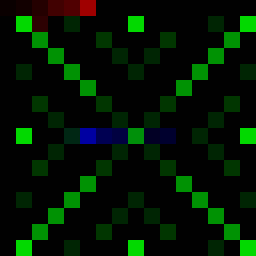

Move: D8, Horizontal, tiles: BRIGADe, score: 76.0
Move 0
Move: D8, Horizontal, tiles: BRIGADe, score: 76.0
base layer 0
[[ 1  2  4  7  9 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
move layer 0
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]

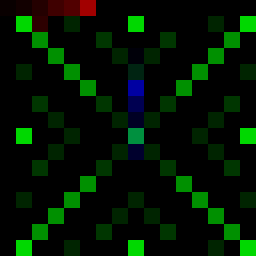

Move: H3, Vertical, tiles: ABRIDGe, score: 76.0
Move 1
Move: H3, Vertical, tiles: ABRIDGe, score: 76.0
base layer 1
[[ 1  2  4  7  9 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
move layer 1
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 

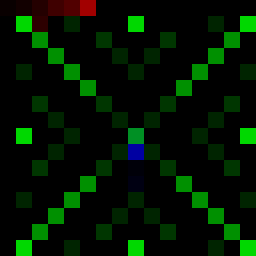

Move: H8, Vertical, tiles: DRAB, score: 14.0
Move 2
Move: H8, Vertical, tiles: DRAB, score: 14.0
base layer 2
[[ 1  2  4  7  9 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
move layer 2
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  

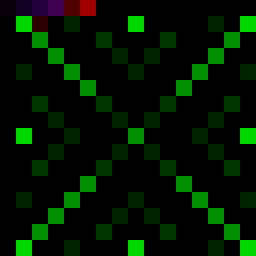

Move: Exchange ADGI
Move 3
Move: Exchange ADGI
base layer 3
[[ 1  2  4  7  9 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
move layer 3
[[1 4 7 9 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0

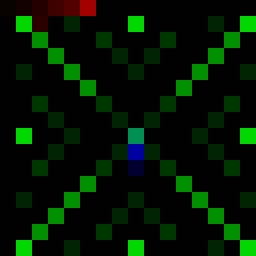

Move: H8, Vertical, tiles: IRe, score: 4.0
Move 4
Move: H8, Vertical, tiles: IRe, score: 4.0
base layer 4
[[ 1  2  4  7  9 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
move layer 4
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0

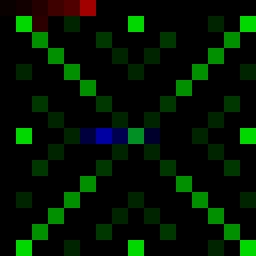

Move: E8, Horizontal, tiles: GRIDe, score: 12.0
Move 5
Move: E8, Horizontal, tiles: GRIDe, score: 12.0
base layer 5
[[ 1  2  4  7  9 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
move layer 5
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 

In [251]:
for i in range(len(wrong_moves)):
    base_layer = copy.deepcopy(game.board.existing_letters[:-1,:-1]) # slice off last sentinel
    # set first sentinel squares to zero instead of sentinel value:
    base_layer[0, :] = 0
    base_layer[:,0] = 0
    # put rack tiles we're playing from in first row:
    base_layer[0][0:len(cached_rack)] = [ord(t)-64 for t in cached_rack.rack_tiles]

    move_layer = np.zeros([16,16], dtype='int')

    # set first sentinel squares to zero instead of sentinel value:
    word_mult = np.where(game.board.word_multipliers>1, game.board.word_multipliers * 8, 0)
    letter_mult = np.where(game.board.letter_multipliers>1, game.board.letter_multipliers*2, 0)
    score_layer = np.where(game.board.existing_letter_scores > 0, game.board.existing_letter_scores*2, word_mult+letter_mult)
    score_layer = score_layer[:-1,:-1] # slice off last sentinel
    # set first sentinel squares to zero instead of sentinel value:
    score_layer[0, :] = 0
    score_layer[:,0] = 0
    
    move = wrong_moves[i]
    move_tiles = move.tiles if move.tiles else []
    
    if move.direction == Direction.NOT_APPLICABLE: # pass or exchange
        # put rack tiles we're exchanging in first row:
        move_layer[0][0:len(move_tiles)] = [ord(t)-64 for t in move.tiles]

    else: # regular move
        row = move_layer[move.row.rank, :] if move.direction == Direction.HORIZONTAL else move_layer[:, move.row.rank]
        # put rack tiles we're playing on board:
        row[move.played_squares] = [ord(t)-64 for t in move.tiles]
        # change score of square containing blank to zero:
        score_layer = np.where(move_layer <= 26, score_layer, 0)
        # change blanks to normal letter ordinal (by subtracting 32)
        move_layer = np.where(move_layer <= 26, move_layer, move_layer - 32)

    # flatten arrays and convert int8 to int so values aren't clipped at 128:
    rgb = zip((base_layer.astype(int)).flatten()*9, (score_layer.astype(int)).flatten()*9, (move_layer.astype(int)).flatten()*9)
    # put in a list:
    rgb = [el for el in rgb]

    # convert to an image, and resize so things like 
    # max pooling layers won't lose all the information in the image:
    img = Image.new('RGB', (16, 16))
    img.putdata(rgb)
    img = img.resize((256,256),Image.NEAREST)
    display(img)
    img.save('alexis_game'+str(i)+'.png')
    
    print(move)
    print("Move "+str(i))
    print(wrong_moves[i])
    print("base layer "+str(i))
    print(base_layer)
    print("move layer "+str(i))
    print(move_layer)
    print("score layer "+str(i))
    print(score_layer)
    

In [208]:
x = np.stack((base_layer, score_layer, move_layer), axis=-1)
x.flatten()
x.dtype

dtype('int8')

In [272]:
score_layer[8,3] = 99
score_layer[1:16, 1:16] = score_layer[1:16, 1:16].T

In [273]:
score_layer

array([[ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  4,  0,  0,  0, 24,  0,  0,  0,  4,  0,  0, 24],
       [ 0,  0, 16,  0,  0,  0,  6,  0,  0,  0,  6,  0,  0,  0, 16,  0],
       [ 0,  0,  0, 16,  0,  0,  0,  4, 99,  4,  0,  0,  0, 16,  0,  0],
       [ 0,  4,  0,  0, 16,  0,  0,  0,  4,  0,  0,  0, 16,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  6,  0,  0,  0,  6,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  4,  0,  4,  0,  0,  0,  4,  0,  0],
       [ 0, 24,  0,  0,  4,  0,  0,  0, 16,  0,  0,  0,  4,  0,  0, 24],
       [ 0,  0,  0,  4,  0,  0,  0,  4,  0,  4,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  6,  0,  0,  0,  6,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  4,  0,  0,  0, 16,  0,  0,  0],
       [ 0,  4,  0, 16,  0,  0,  0,  4,  0,  4,  0,

In [253]:
quackle_move.played_squares

array([ 4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [255]:
fred.append('5')

NameError: name 'fred' is not defined

In [197]:
(base_layer*9).flatten(), (score_layer*9).flatten(), (move_layer*9).

SyntaxError: invalid syntax (<ipython-input-197-f62ec070f83b>, line 1)

In [167]:
rgb


[(9, 0, 0),
 (18, 0, 0),
 (36, 0, 0),
 (63, 0, 0),
 (81, 0, 0),
 (-94, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, -40, 0),
 (45, 0, 0),
 (0, 0, 0),
 (0, 36, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, -40, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 36, 0),
 (0, 0, 0),
 (0, -40, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, -112, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 54, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 54, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, -112, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, -112, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 36, 0),
 (0, 0, 0),
 (0, 36, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, -112, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 36, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, -112, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 36, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, -112, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 36, 0),


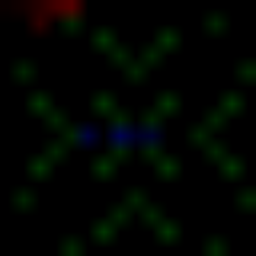

In [171]:
img = Image.new('RGB', (16, 16))
img.putdata(rgb)
img = img.resize((256,256), Image.BILINEAR)
display(img)

In [31]:
b = game.board.existing_letters
b = b[:-1,:-1]
b[0, :] = 0
b[:,0] = 0
b

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8)

In [330]:
None.isdigit()

AttributeError: 'NoneType' object has no attribute 'isdigit'

In [ ]:
[i for i in range(1,1)]

In [ ]:
base_board

In [ ]:
# don't mess up board:


# game.validator.is_valid(quackle_move)

quackle_move

In [ ]:
# check we're now missing the played letters
game.active_player.rack

In [ ]:
board = game.board
board

In [ ]:
# save board before play:
pre_move_board = copy.deepcopy(board.existing_letters)
pre_move_board

In [ ]:
# now use actual board row:
move.row = board.get_row(move.row.rank, move.direction)
move.row.place_tiles(move.played_squares,move.tiles)
game.validator.is_valid(move)
game.execute_move(move)
move

In [ ]:
game.validator.is_valid(move)

In [ ]:
board

In [ ]:
board.existing_letters-pre_move_board

In [ ]:
moves = player1.generate_all_moves()

In [ ]:
moves

In [ ]:
game.execute_move(move)
game.change_active_player()
game.update_players()
board

In [ ]:
game.validator.is_valid(move)
move.calculate_score()
move

In [ ]:
move.row

In [ ]:
game.board

In [ ]:
move.calculate_score()

In [ ]:
tile_values = [(LETTER_VALUES[(ord(t)-64)] if t.isupper() else LETTER_VALUES[0]) for t in move.tiles]
tile_values

In [ ]:
squares_in_whole_word = move.row.squares_in_word(move.start_index)
print(squares_in_whole_word)

In [ ]:
game.active_player.rack.rack_tiles

In [ ]:
board  = game.board
board

In [ ]:
import re

In [ ]:
re.sub(r'\?.', lambda m: m.group(0).lower()[-1], 'D8HBARD?ING')

In [ ]:
input_string = gui.strip_invalid_characters('D8HBARD?ING')

In [ ]:
input_string

In [ ]:
x = ord(input_string[0]) - 64
y = gui.digits_in_string(input_string)

In [ ]:
x, y

In [ ]:
input_string = gui.letters_in_string(input_string)

In [ ]:
input_string

In [ ]:
if input_string[1] == 'H':
    row = gui.board.get_row(y, Direction.HORIZONTAL)
    starting_square = x

In [ ]:
row

In [ ]:
input_string = input_string[2:]

In [ ]:
input_string = re.sub(r'\?.', lambda m: m.group(0).lower()[-1], input_string)

In [ ]:
input_string in gui.game.active_player.rack

In [ ]:
'BARDIG' in game.active_player.rack

In [ ]:
game.active_player.rack.rack_tiles = '@ABDGIR'

In [ ]:
str(game.active_player.rack)

In [ ]:
rack = game.active_player.rack

In [ ]:
'DGI' in rack